## Lets make the 2 qubits random
it should give us about 25% chances for each outcome

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [13]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.measure(qubit=[0,1], cbit=[0,1])
qc.draw()

┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

In [14]:
backend_sim = Aer.get_backend('qasm_simulator')

from qiskit.primitives import (
    StatevectorSampler
)
sampler_v2 = StatevectorSampler()

res = sampler_v2.run([qc], shots=1000).result()
x = res[0].data['c'] or None

In [15]:
x.get_counts()

{'00': 244, '11': 265, '10': 248, '01': 243}

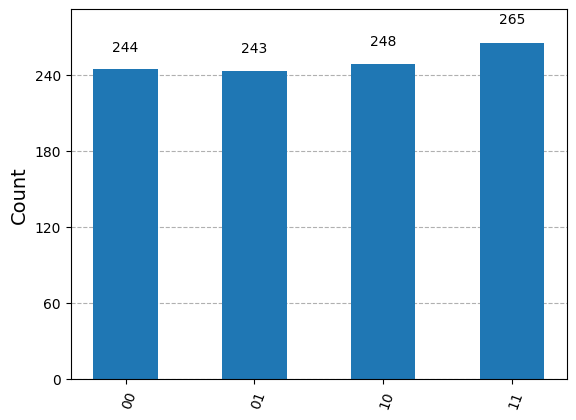

In [16]:
plot_histogram(x.get_counts())

## Now we can make the 2 qubits entangled
the CNOT gate is the key

In [17]:
qc = QuantumCircuit(2,2, name="entanglement")
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
qc.measure(qubit=[0,1], cbit=[0,1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

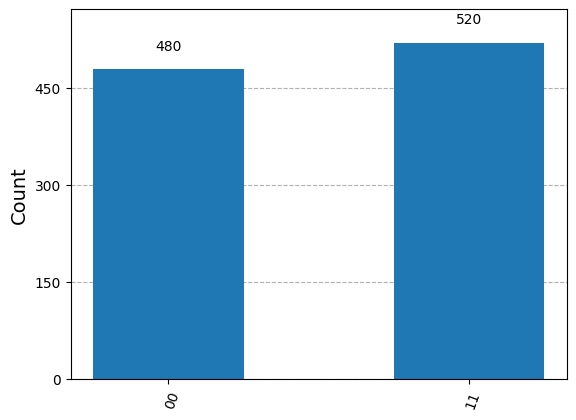

In [19]:
res = sampler_v2.run([qc], shots=1000).result()
x = res[0].data['c'] or None
counts = x.get_counts()
plot_histogram(counts)